# Task 1:
## 1. Dataset and Knowledge Base Creation.

In [1]:
import random
import csv
import json
import pandas as pd
import numpy as np

In [2]:
knowledge_base = {
    "competitors": ["CompetitorX", "CompetitorY", "CompetitorZ", "VendorA", "RivalB", "CompanyC", "StartupD", "ProviderE", "EnterpriseF"],
    "features": ["analytics", "AI engine", "data pipeline", "reporting tools", "workflow automation", "custom integrations", "predictive modeling", "recommendation system"],
    "pricing_keywords": ["discount", "renewal cost", "budget", "pricing model", "subscription", "monthly fees", "quote", "billing cycle", "cost structure", "hidden fees"],
    "security_concerns": ["SOC2 certified", "data handling", "encryption", "compliance", "data breach risks", "privacy policies", "firewalls", "GDPR compliance", "backup and recovery"]
}

with open("../data/knowledge_base.json","w") as file:
  json.dump(knowledge_base,file,indent=4)

In [3]:
label_keywords = {
    "Objection": ["hesitant", "concerned", "not satisfied", "too expensive"],
    "Pricing Discussion": ["pricing", "budget", "discount", "cost", "renewal"],
    "Security": ["SOC2 certified", "compliance", "data handling", "encryption"],
    "Competition": ["better than", "cheaper than", "compared to", "evaluating"]
}

def generate_template():
    label = random.choice(list(label_keywords.keys()))
    keyword = random.choice(label_keywords[label])
    competitor = random.choice(knowledge_base["competitors"])
    feature = random.choice(knowledge_base["features"])
    pricing_keyword = random.choice(knowledge_base["pricing_keywords"])
    security_concern = random.choice(knowledge_base["security_concerns"])

    templates = {
        "Objection": [
            f"Honestly, I’m not sure your {feature} is as strong as {competitor}'s.",
            f"We’re concerned about your {security_concern}—can you clarify?",
            f"The {pricing_keyword} is a deal-breaker for us unless you can adjust it.",
            f"I don’t see why we should pick your product over {competitor}’s.",
            f"You’re saying this {feature} is robust, but I’m hesitant—it sounds too risky."
        ],
        "Pricing Discussion": [
            f"What’s your {pricing_keyword} for scaling up to 100 users?",
            f"Can you beat {competitor}’s {pricing_keyword}? Their offer seems better.",
            f"Is there a {pricing_keyword} if we commit to a longer-term contract?",
            f"I’d like a quote with no hidden fees. Does your pricing include {feature} support?",
            f"We’re considering your solution, but {competitor}’s {pricing_keyword} is more attractive."
        ],
        "Security": [
            f"Can you guarantee {security_concern} for our compliance team?",
            f"I read about {competitor} having issues with {security_concern}. What’s your policy?",
            f"How do you ensure {security_concern} for sensitive data?",
            f"We can’t move forward without clarity on {security_concern}—can you elaborate?",
            f"Does your {feature} include built-in {security_concern} measures?"
        ],
        "Competition": [
            f"We’re comparing your {feature} with {competitor}'s. How does yours stack up?",
            f"Honestly, {competitor} seems better in terms of {pricing_keyword}. Can you explain why we should pick you?",
            f"We’ve been using {competitor}, but we’re open to switching. Convince us.",
            f"How does your {feature} compare to {competitor}'s {feature}?",
            f"We’re considering {competitor} because their {feature} sounds more advanced."
        ]
    }
    snippet = random.choice(templates[label])
    return snippet, label

In [4]:
def generate_snippet_with_labels():
    snippet, primary_label = generate_template()
    additional_labels = random.sample(
        [label for label in label_keywords.keys() if label != primary_label],
        k=random.randint(0, 2)
    )
    all_labels = [primary_label] + additional_labels
    return snippet, ",".join(all_labels)

In [8]:
with open("../data/calls_dataset.csv", mode="w", newline="") as file:
    writer = csv.writer(file)
    writer.writerow(["id", "text_snippet", "labels"])
    for i in range(1, 501):  # 500 records
        snippet, labels = generate_snippet_with_labels()
        writer.writerow([i, snippet, labels])

### Sample Data from "calls_dataset.csv"

In [10]:
data = pd.read_csv('calls_dataset.csv')
data.head(100)[["text_snippet","labels"]]

,text_snippet,labels
0,What s your pricing model for scaling up to 10...,"Pricing Discussion,Objection,Security"
1,We can t move forward without clarity on backu...,"Security,Objection,Competition"
2,Does your AI engine include built-in encryptio...,Security
3,"You re saying this AI engine is robust, but I ...",Objection
4,I d like a quote with no hidden fees. Does you...,Pricing Discussion
...,...,...
95,What s your pricing model for scaling up to 10...,Pricing Discussion
96,Does your reporting tools include built-in enc...,"Security,Competition,Pricing Discussion"
97,Can you beat CompetitorX s subscription? Their...,Pricing Discussion
98,How do you ensure SOC2 certified for sensitive...,"Security,Objection,Competition"


## 2. Data Preprocessing

In [11]:
import nltk
import seaborn as sns
import matplotlib.pyplot as plt

from textblob import TextBlob
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, multilabel_confusion_matrix

nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\chnvd\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\chnvd\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt_tab.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\chnvd\AppData\Roaming\nltk_data...


True

In [12]:
# convert text to lower case to avoid unwanted complexity.
data_processed = data.copy()
data_processed['text_snippet'] = data_processed['text_snippet'].str.lower()
data_processed['labels'] = data_processed['labels'].str.lower()

# spelling correction
def correct_spelling(text):
    return str(TextBlob(text).correct())

data_processed['text_snippet'] = data_processed['text_snippet'].apply(correct_spelling)

# remove stop-words
stopwords = [
    "i", "we", "we're", "we've", "you", "your", "our", "it", "their",
    "is", "are", "does", "do", "should", "don’t",
    "and", "as", "but", "for", "of", "to", "with", "over", "about", "on",
    "what", "why", "how",
    "a", "the", "no", "any",
    "would", "could", "should",
    "unless", "more", "see", "sounds", "seems"
]

data_processed['text_snippet'] = data_processed['text_snippet'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stopwords)]))

# lemmatization
lemmatizer = WordNetLemmatizer()
data_processed['text_snippet'] = data_processed['text_snippet'].apply(lambda x: ' '.join([lemmatizer.lemmatize(word) for word in x.split()]))

In [13]:
x = data_processed['text_snippet']
data_processed['labels'] = data['labels']

data_processed['labels'] = data_processed['labels'].apply(lambda x: x.split(','))

mlb = MultiLabelBinarizer()

y = mlb.fit_transform(data_processed['labels'])

y[:5]

array([[0, 1, 1, 1],
       [1, 1, 0, 1],
       [0, 0, 0, 1],
       [0, 1, 0, 0],
       [0, 0, 1, 0]])

In [14]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [15]:
X_train.head()

249    re comparing analysis competitors's. yours sti...
433    read rival having issue sock terrified. s policy?
19                 budget deal-breakers u can adjust it.
322                     don t pick product competitor s.
332                s filling cycle sealing up 100 users?
Name: text_snippet, dtype: object

In [16]:
vectorizer = TfidfVectorizer()

logistic_regression = MultiOutputClassifier(LogisticRegression(max_iter=200))
svm_classifier = MultiOutputClassifier(SVC(kernel='linear'))
random_forest = MultiOutputClassifier(RandomForestClassifier(n_estimators=100))

def create_pipeline(classifier):
    return Pipeline([
        ('vectorizer', vectorizer),
        ('classifier', classifier)
    ])

logistic_pipeline = create_pipeline(logistic_regression)
svm_pipeline = create_pipeline(svm_classifier)
rf_pipeline = create_pipeline(random_forest)

logistic_pipeline.fit(X_train, y_train)
svm_pipeline.fit(X_train, y_train)
rf_pipeline.fit(X_train, y_train)

Pipeline(steps=[('vectorizer', TfidfVectorizer()),
                ('classifier',
                 MultiOutputClassifier(estimator=RandomForestClassifier()))])

In [17]:
from sklearn.model_selection import GridSearchCV

log_parameters = {
    'classifier__estimator__C': [0.1, 1, 10],
    'classifier__estimator__max_iter': [100, 500]
}

svm_param_grid = {
    'classifier__estimator__C': [0.1, 1, 10],
    'classifier__estimator__gamma': ['scale', 'auto']
}

rf_param_grid = {
    'classifier__estimator__n_estimators': [50, 100, 200],
    'classifier__estimator__max_depth': [10, 20, None]
}

grid_search = GridSearchCV(logistic_pipeline, log_parameters, cv=5, verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)

svm_grid_search = GridSearchCV(svm_pipeline, svm_param_grid, cv=5, verbose=1, n_jobs=-1)
svm_grid_search.fit(X_train, y_train)

rf_grid_search = GridSearchCV(rf_pipeline, rf_param_grid, cv=5, verbose=1, n_jobs=-1)
rf_grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Fitting 5 folds for each of 9 candidates, totalling 45 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('vectorizer', TfidfVectorizer()),
                                       ('classifier',
                                        MultiOutputClassifier(estimator=RandomForestClassifier()))]),
             n_jobs=-1,
             param_grid={'classifier__estimator__max_depth': [10, 20, None],
                         'classifier__estimator__n_estimators': [50, 100, 200]},
             verbose=1)

In [18]:
logistic_pred = logistic_pipeline.predict(X_test)
svm_pred = svm_pipeline.predict(X_test)
rf_pred = rf_pipeline.predict(X_test)

# Evaluate performance
print("Logistic Regression Classification Report:")
print(classification_report(y_test, logistic_pred, target_names=mlb.classes_))

print("SVM Classification Report:")
print(classification_report(y_test, svm_pred, target_names=mlb.classes_))

print("Random Forest Classification Report:")
print(classification_report(y_test, rf_pred, target_names=mlb.classes_))

Logistic Regression Classification Report:
                    precision    recall  f1-score   support

       Competition       0.85      0.60      0.70        55
         Objection       0.86      0.71      0.78        52
Pricing Discussion       0.89      0.45      0.60        55
          Security       0.77      0.47      0.58        43

         micro avg       0.85      0.56      0.67       205
         macro avg       0.84      0.56      0.67       205
      weighted avg       0.85      0.56      0.67       205
       samples avg       0.91      0.66      0.70       205

SVM Classification Report:
                    precision    recall  f1-score   support

       Competition       0.91      0.56      0.70        55
         Objection       0.97      0.65      0.78        52
Pricing Discussion       0.92      0.42      0.57        55
          Security       1.00      0.37      0.54        43

         micro avg       0.95      0.51      0.66       205
         macro avg       

In [19]:
X_test.head(1)

361    read competitor having issue privacy policies....
Name: text_snippet, dtype: object

In [20]:
test_cases = [
    "CompetitorX has a better pricing model, but we are more secure.",
    "Our service is cheaper than CompetitorY, and it comes with an advanced AI engine.",
    "Are you SOC2 certified? We need to ensure data handling complies with security standards.",
    "We love your product, but the renewal cost is too high compared to CompetitorZ.",
    "How does your system handle large volumes of data? We need something with scalability."
]

# actual output for test_cases
# ["Pricing Discussion", "Security", "Competition"],
# ["Pricing Discussion", "Competition", "Features"],
# ["Security"],
# ["Objection", "Pricing Discussion", "Competition"],
# ["Security"]


def predict_labels(pipeline, test_cases):
    predictions = pipeline.predict(test_cases)
    return mlb.inverse_transform(predictions)

logistic_preds = predict_labels(logistic_pipeline, test_cases)
svm_preds = predict_labels(svm_pipeline, test_cases)
rf_preds = predict_labels(rf_pipeline, test_cases)

for i, test_case in enumerate(test_cases):
    print(f"Test Case {i+1}: {test_case}")
    print(f"Logistic Regression: {logistic_preds[i]}")
    print(f"SVM: {svm_preds[i]}")
    print(f"Random Forest: {rf_preds[i]}")
    print()

Test Case 1: CompetitorX has a better pricing model, but we are more secure.
Logistic Regression: ('Pricing Discussion',)
SVM: ()
Random Forest: ()

Test Case 2: Our service is cheaper than CompetitorY, and it comes with an advanced AI engine.
Logistic Regression: ('Competition', 'Objection')
SVM: ('Competition',)
Random Forest: ('Competition', 'Objection', 'Security')

Test Case 3: Are you SOC2 certified? We need to ensure data handling complies with security standards.
Logistic Regression: ('Competition', 'Security')
SVM: ('Security',)
Random Forest: ('Competition', 'Security')

Test Case 4: We love your product, but the renewal cost is too high compared to CompetitorZ.
Logistic Regression: ('Objection', 'Pricing Discussion')
SVM: ('Objection',)
Random Forest: ('Objection', 'Pricing Discussion')

Test Case 5: How does your system handle large volumes of data? We need something with scalability.
Logistic Regression: ('Competition', 'Security')
SVM: ('Security',)
Random Forest: ('Secur

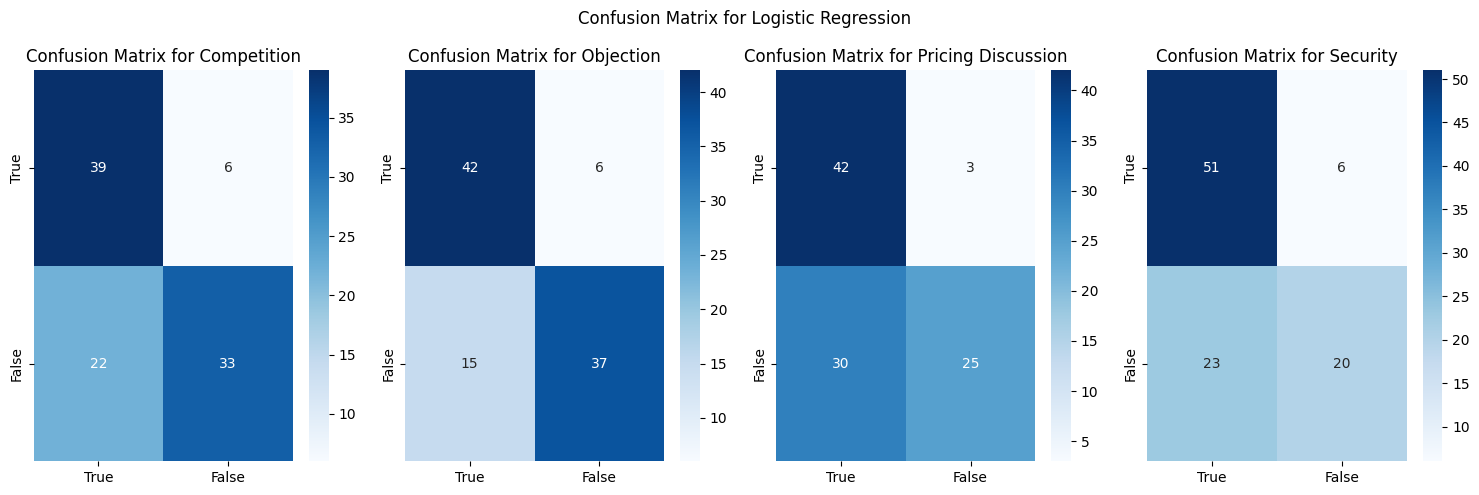

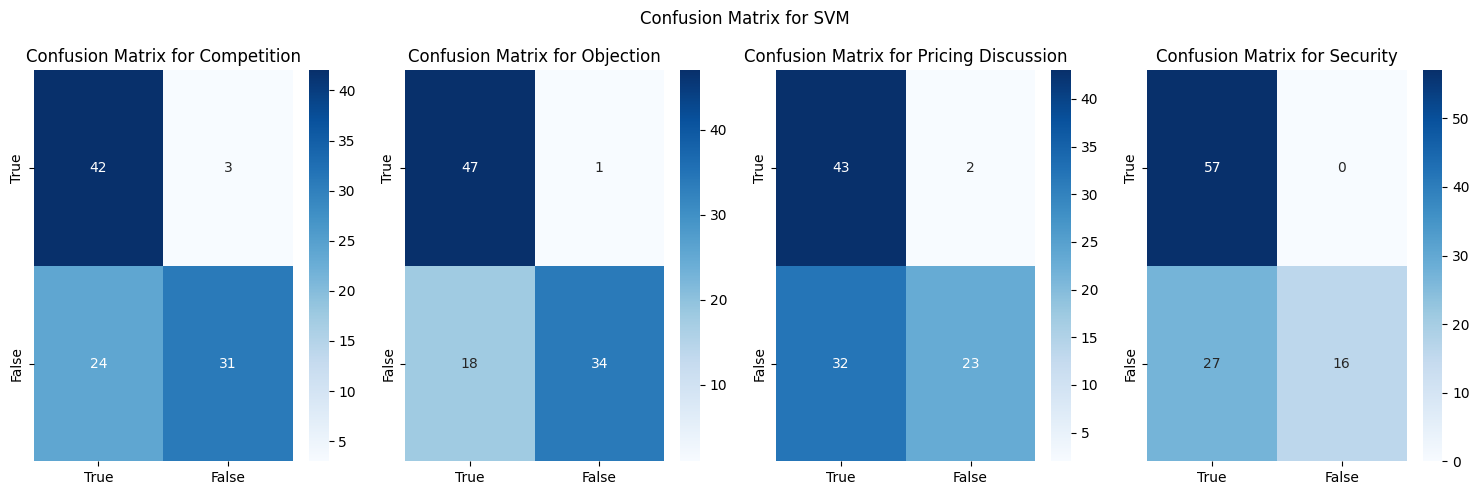

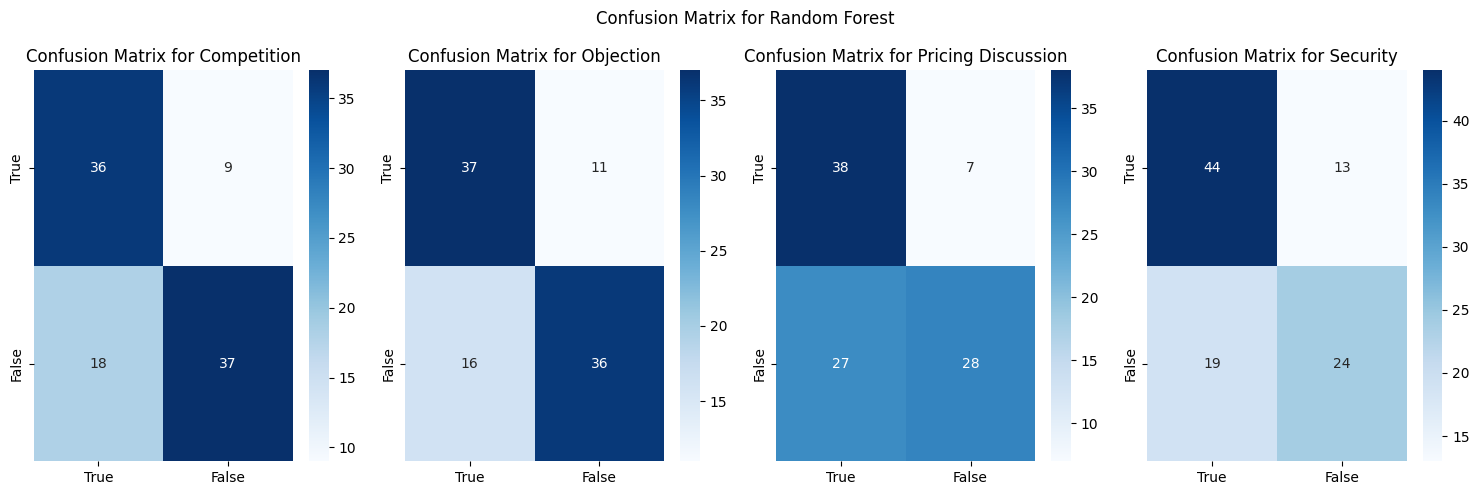

In [21]:
def plot_confusion_matrix(y_true, y_pred, labels, classifier_name):
    mcm = multilabel_confusion_matrix(y_true, y_pred)

    fig, axes = plt.subplots(1, len(labels), figsize=(15, 5))

    for i, ax in enumerate(axes):
        cm = mcm[i]
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['True', 'False'], yticklabels=['True', 'False'], ax=ax)
        ax.set_title(f'Confusion Matrix for {labels[i]}')

    plt.suptitle(f'Confusion Matrix for {classifier_name}')
    plt.tight_layout()
    plt.show()

logistic_pred = logistic_pipeline.predict(X_test)
svm_pred = svm_pipeline.predict(X_test)
rf_pred = rf_pipeline.predict(X_test)

plot_confusion_matrix(y_test, logistic_pred, mlb.classes_, "Logistic Regression")

plot_confusion_matrix(y_test, svm_pred, mlb.classes_, "SVM")

plot_confusion_matrix(y_test, rf_pred, mlb.classes_, "Random Forest")

In [22]:
import joblib

joblib.dump(logistic_pipeline, 'multi_label_classifier_logreg.pkl')
joblib.dump(svm_pipeline, 'multi_label_classifier_svm.pkl')
joblib.dump(rf_pipeline, 'multi_label_classifier_rf.pkl')

['multi_label_classifier_rf.pkl']